# Laboratorio 4

Integrantes:

######################################

######################################



## Causalidad y Memoria

### Punto 1: Promedio móvil

In [ ]:
def moving_average(sequence, window_size):
    if window_size <= 0 or window_size > len(sequence):
        raise ValueError("Window size is invalid.")
    averages = []
    for i in range(window_size, len(sequence)):
        average = (sequence[i] + sequence[i-1] + sequence[i-2]) / 3
        averages.append(average)
    return averages


# Ejemplo de uso
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
averages = moving_average(numbers, 3)
print(averages)



[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


**Ingrese aquí su respuesta al punto 1**

El sistema es causal puesto que depende de instantes de tiempo previos y el instante de tiempo actual $t$. El sistema tiene memoria puesto que evalua instantes de tiempos previos al actual

### Punto 2: Sistema amplificador

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(duration, frequency):
    time = np.linspace(0, duration, num=1000)
    amplitude = np.sin(2 * np.pi * frequency * time)
    return amplitude

def amplifier(input_signal, gain):
    amplified_signal = input_signal * gain
    return amplified_signal

# Generar la señal sinusoidal y la señal amplificada
wave = generate_sine_wave(1, 5)
amplified_wave = amplifier(wave, 2)

# Grafique wave y amplified_wave aquí
time_axis = np.linspace(0, 1, num=len(wave))

# Graficar la señal original y la señal amplificada
plt.figure(figsize=(8, 4))
plt.plot(time_axis, wave, label="Señal Sinusoidal")
plt.plot(time_axis, amplified_wave, label="Señal Amplificada", linestyle="--")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Comparación: Señal Sinusoidal vs Señal Amplificada")
plt.legend()
plt.grid(True)
plt.show()

El sistema es causal dado a que sus tiempos t depende de sus valores presentes. Sin embargo, este no tiene memoría dado a que no depende de sus valores pasados o futuros, solamente del presente.

### Punto 3: Sistema de modulación AM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def amplitude_modulation(carrier_signal, message_signal, modulation_index):
    modulated_signal = (1 + modulation_index * message_signal) * carrier_signal
    return modulated_signal

# Generar las señales
t = np.linspace(0, 1, num=1000)
carrier_signal = np.cos(2 * np.pi * 10 * t)  # Señal portadora (cos(2πfct))
message_signal = np.sin(2 * np.pi * 2 * t)   # Señal de mensaje (sin(2πfmt))
modulation_index = 0.5

modulated_signal = amplitude_modulation(carrier_signal, message_signal, modulation_index)

# Configurar la figura y los ejes
plt.figure(figsize=(6, 4))
plt.title("Modulación de Amplitud (AM)")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")

# Graficar las señales
plt.plot(t, message_signal, label="Señal de mensaje")
plt.plot(t, modulated_signal, label="Señal modulada")

# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()

**Ingrese aquí su respuesta al punto 3**

Se puede observar en el código de la función que sólo se realizan cálculos haciendo uso del $t$ actual, esto cabe dentro de la definición de un sistema *causal* puesto que puede depender de tiempos pasados o sólo del tiempo presente (no todo sistema causal tiene memoria).

### Punto 4: Sistema de suavizado exponencial

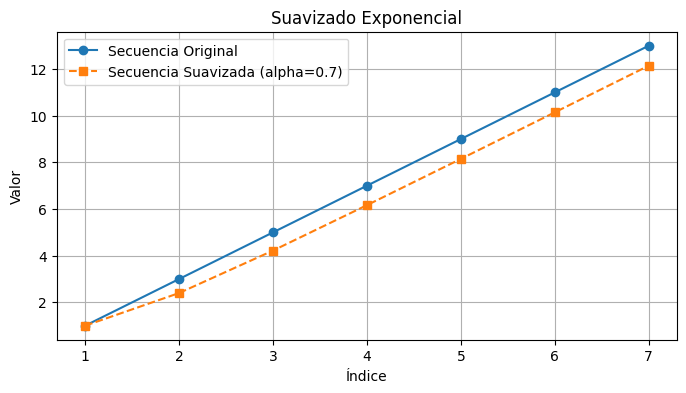

In [ ]:
def exponential_smoothing(sequence, smoothing_factor):
    smoothed_sequence = [sequence[0]]  # Inicializar con el primer valor
    for i in range(1, len(sequence)):
        smoothed_value = smoothing_factor * sequence[i] + (1 - smoothing_factor) * smoothed_sequence[i - 1]
        smoothed_sequence.append(smoothed_value)
    return smoothed_sequence

# Ingrese los parámetros a la función aquí
# Definir la secuencia y el smoothing factor
sequence = [1, 3, 5, 7, 9, 11, 13]
smoothing_factor = 0.7

# Aplicar el suavizado exponencial a la secuencia
smoothed_sequence = exponential_smoothing(sequence, smoothing_factor)

# Crear un eje x para graficar (usamos los índices de la secuencia)
x_axis = list(range(1, len(sequence) + 1))

# Graficar la secuencia original y la secuencia suavizada
plt.figure(figsize=(8, 4))
plt.plot(x_axis, sequence, 'o-', label="Secuencia Original")
plt.plot(x_axis, smoothed_sequence, 's--', label="Secuencia Suavizada (alpha=0.7)")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Suavizado Exponencial")
plt.legend()
plt.grid(True)
plt.show()

El sistema es causal dado a que depende de los valores pasados y presentes. Esto se observa en el for creada para dicha funcion, al tener en cuenta el valor de la salida suavizada y[t-1]. Por otra parte, el sistema tiene memoria dado a que como mencionado previamente este depende de un tiempo pasado.

### Punto 5: Sistema de suma acumulativa

In [ ]:
def cumulative_sum(sequence):
    cumulative_sequence = [sequence[0]]  # Inicializar con el primer valor
    for i in range(1, len(sequence)):
        cumulative_value = cumulative_sequence[i - 1] + sequence[i]
        cumulative_sequence.append(cumulative_value)
    return cumulative_sequence

# Ejemplo de uso
numbers = [1, 2, 3, 4, 5]
cumulative_numbers = cumulative_sum(numbers)


plt.plot(numbers, cumulative_numbers, label="Señal de Salida")



**Ingrese aquí su respuesta al punto 5**

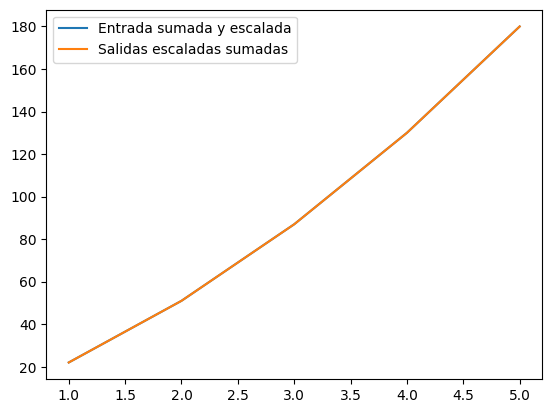

In [40]:
# Valores de entrada
alpha = 4
beta = 3
numbers = [1, 2, 3, 4, 5]
other_numbers = [6, 7, 8, 9, 10]

# Aplicar la suma acumulativa a las entradas escaladas
cumulative_numbers = cumulative_sum([alpha * num for num in numbers])
other_cumulative_numbers = cumulative_sum([beta * num for num in other_numbers])

# Construir la entrada combinada
input_added_and_scaled = []
for i in range(len(numbers)):
    number_k = alpha * numbers[i]
    other_number_k = beta * other_numbers[i]
    result_k = number_k + other_number_k
    input_added_and_scaled.append(result_k)

# Aplicar la suma acumulativa a la entrada combinada
cumulative_added_and_scaled = cumulative_sum(input_added_and_scaled)

# Sumar las salidas individuales escaladas
scaled_outputs_summed = []
for i in range(len(other_cumulative_numbers)):
    scaled_outputs_summed.append(cumulative_numbers[i] + other_cumulative_numbers[i])

# Graficar los resultados
plt.plot(numbers, cumulative_added_and_scaled, label="Entrada sumada y escalada")
plt.plot(numbers, scaled_outputs_summed, label="Salidas escaladas sumadas")
plt.legend()
plt.show()

Entonces el sistema es lineal

## Linealidad e Invarianza


In [ ]:
# definición de función para un sistema arbitrario
import numpy as np
import matplotlib.pyplot as plt

def sistema(input_signal):
    output_signal = 2 * input_signal + 3
    return output_signal



### Punto 6: Linealidad

In [ ]:
# Generar una señal de entrada constante
t = np.linspace(0,5,1000) 
input_signal_1 = 2*np.ones(len(t))
input_signal_2 = 3 * np.ones(len(t))

# Obtener las salidas del sistema para cada entrada
output_signal_1 = sistema(input_signal_1)
output_signal_2 = sistema(input_signal_2)


# Graficar las señales de entrada y salida
plt.figure(figsize=(6,4))
plt.plot(t, input_signal_1, label='Entrada 1 (valor = 2)', color='blue')
plt.plot(t, output_signal_1, '--', label='Salida 1 (2*2+3 = 7)', color='blue')
plt.plot(t, input_signal_2, label='Entrada 2 (valor = 3)', color='red')
plt.plot(t, output_signal_2, '--', label='Salida 2 (2*3+3 = 9)', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Señales de Entrada y Salida del Sistema')
plt.legend()
plt.grid(True)
plt.show()

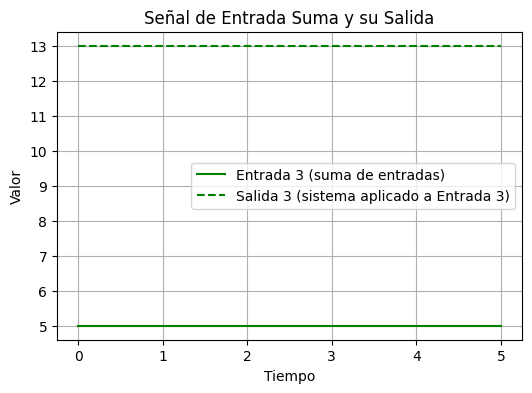

In [20]:
# Ahora la señal de entrada es igual a la suma de las dos entradas anteriores
input_signal_3 = input_signal_1 + input_signal_2  # Suma punto a punto
output_signal_3 = sistema(input_signal_3)

# Graficar las señales de entrada y salida
plt.figure(figsize=(6,4))
plt.plot(t, input_signal_3, label='Entrada 3 (suma de entradas)', color='green')
plt.plot(t, output_signal_3, '--', label='Salida 3 (sistema aplicado a Entrada 3)', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Señal de Entrada Suma y su Salida')
plt.legend()
plt.grid(True)
plt.show()

Este sistema no es lineal porque no satisface la propiedad de aditividad. La suma de las salidas y_1(t)  y y_2(t)  no coincide con la salida y_3(t), obtenida al aplicar la suma de las entradas. Dado que 16 no es igual a 13, el sistema no es lineal.

### Punto 7: Invariancia en el tiempo

In [43]:
# Aplicar la señal desplazada en el tiempo al sistema
t = np.linspace(0,2,1000)

f = # Frecuencia de la señal
t0 = # Desplazamiento en el tiempo

input_signal_4 = np.sin(2*np.pi*f*(t-t0)) # Señal desplazada en el tiempo
output_signal = sistema(input_signal_4) # Señal de salida obtenida

output_shifted = 2*np.sin(2*np.pi*f*(t-t0)) + 3 # Señal de salida esperada

# Graficar  la entrada desplazada en el tiempo, la señal de salida obtenida para esta señal y la señal de salida esperada
plt.figure(figsize=(6,4))


SyntaxError: invalid syntax (719885665.py, line 4)

**Con el procedimiento anterior indique si el sistema es inivariante en el tiempo o no. Justifique su respuesta** 